# Mortality Dataset Project 

PROBLEM STATEMENT: Trends/Changes in Mortality


**STEPS:**
```
- Data Loading
- Data Cleaning
- Descriptive Analysis
- EDA
```
**DATA:**
```
- Data is taken from CDC.gov
```

In [151]:
import pandas as pd
import numpy as np
import re
import math

import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

## Data Loading

In [152]:
df = pd.read_csv("VS17MORT.csv", low_memory=False, nrows=500000) # Mortality dataset's DATAFRAME

In [153]:
df.head(5)

,Resident_Status,Education,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Sub_Flag,Age_Recode_52,Age_Recode_27,Age_Recode_12,...,RA18,RA19,RA20,Race,Race_Bridged,Race_Imputation,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,,101,M,1,71,,40,20,9,...,,,,1,,,1,1,100,6
1,1,,101,M,1,74,,40,20,9,...,,,,1,,,1,1,100,6
2,1,,101,M,1,59,,37,17,8,...,,,,1,,,1,1,100,6
3,1,,101,M,1,90,,44,24,11,...,,,,3,,,2,3,100,8
4,1,,101,M,1,66,,39,19,9,...,,,,1,,,1,1,100,6


In [154]:
df.shape

(500000, 75)

In [155]:
df.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [156]:
df[" Education"].unique()

array([' '], dtype=object)

## Data Cleaning

In [157]:
def removeSpaces(item):
    regex = re.compile("\S+")
    if type(item) == str:
        rep = regex.findall(item)
        return rep[0] if len(rep) else item
    return item

def cleanColumns(dataFrame):
    return dataFrame.rename(columns=lambda x: removeSpaces(x))

In [158]:
df = cleanColumns(df)

In [159]:
df.columns

Index(['Resident_Status', 'Education', 'Month_Of_Death', 'Sex', 'Age_Key',
       'Age_Value', 'Age_Sub_Flag', 'Age_Recode_52', 'Age_Recode_27',
       'Age_Recode_12', 'Infant_Age_Recode_22', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4', 'EAC5',
       'EAC6', 'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13',
       'EAC14', 'EAC15', 'EAC16', 'EAC17', 'EAC18', 'EAC19', 'EAC20',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5', 'RA6',
       'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14', 'RA15',
       'RA16', 'RA17', 'RA18', 'RA19', 'RA20', 'Race', 'Race_Bridged',
       'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5', 'H

In [160]:
df = df[df["Age_Value"] < 150]

In [161]:
df["RA11"].value_counts()

         498688
 W80         43
 R688        43
 R090        33
 N179        32
          ...  
 K559         1
 K859         1
 T71          1
 K767         1
 N309         1
Name: RA11, Length: 250, dtype: int64

In [162]:
def getInValuableColumns(dataframe):
    features = df.columns
    drop = []
    for col in features:
        feature = dataframe[col]
        if ' ' in feature.value_counts() and np.sum(feature[feature == ' '].value_counts())/dataframe.shape[0] > 0.7:
            drop.append(col)
    return drop

In [163]:
# df = df.drop(columns=[x for x in df.columns if len(df[x].unique()) <= 1 or df[x].unique()[0] == None])
df = df.drop(columns=getInValuableColumns(df))

In [164]:
def cleanEmptyStringValues(_df):
    return _df.applymap(lambda x: x if str(x) != ' ' else None)

In [165]:
df = cleanEmptyStringValues(df)

In [166]:
def fixStringValues(_df):
    return _df.applymap(lambda x: removeSpaces(x))

In [167]:
df = fixStringValues(df)

In [168]:
def replaceNAWithMode(_df):
    for column in _df.columns:
        try:
            _mode = _df[column].mode()[0]
            _df[column] = _df[column].fillna(_mode)
        except:
            pass
    return _df

In [169]:
df = replaceNAWithMode(df)

In [170]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

In [171]:
df.columns.size

35

In [172]:
def tryConvertingToNumber(value):
    try:
        val = int(value)
        return val
    except:
        return value

df = df.applymap(tryConvertingToNumber)

In [173]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

In [174]:
df.head()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Place_Of_Death,Marital_Status,...,Record_Axis_Conditions,RA1,RA2,RA3,RA4,Race,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,101,M,1,71,40,20,9,1,M,...,1,G20,I469,I469,I469,1,1,1,100,6
1,1,101,M,1,74,40,20,9,1,D,...,2,M726,A419,I469,I469,1,1,1,100,6
2,1,101,M,1,59,37,17,8,4,M,...,2,C159,F179,I469,I469,1,1,1,100,6
3,1,101,M,1,90,44,24,11,4,M,...,1,C61,I469,I469,I469,3,2,3,100,8
4,1,101,M,1,66,39,19,9,4,M,...,3,J449,C900,F179,I469,1,1,1,100,6


In [175]:
df.tail()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Place_Of_Death,Marital_Status,...,Record_Axis_Conditions,RA1,RA2,RA3,RA4,Race,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
499995,3,110,M,1,82,42,22,10,6,W,...,2,I251,I10,I469,I469,1,1,1,100,6
499996,1,110,M,1,84,42,22,10,6,M,...,2,C900,D619,I469,I469,1,1,1,100,6
499997,1,110,F,1,65,39,19,9,1,M,...,1,C220,I469,I469,I469,2,3,2,100,7
499998,1,110,F,1,98,45,25,11,6,W,...,1,R628,I469,I469,I469,1,1,1,100,6
499999,1,110,M,1,60,38,18,8,4,D,...,1,C719,I469,I469,I469,1,1,1,100,6


### Actual usable columns for the dataset(s):

In [176]:
f"Usable Columns: {df.shape[1]}"

'Usable Columns: 35'

## Descriptive Statistics

In [177]:
for column in df.columns:
    try:
        mean = df[column].mean()
        if mean > 0:
            print(df[column].describe())
    except:
        pass

count    499828.000000
mean          1.170741
std           0.458755
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: Resident_Status, dtype: float64
count    499828.000000
mean        106.423614
std           3.529054
min         101.000000
25%         103.000000
50%         106.000000
75%         110.000000
max         112.000000
Name: Month_Of_Death, dtype: float64
count    499828.000000
mean          1.022520
std           0.283614
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: Age_Key, dtype: float64
count    499828.000000
mean         73.217579
std          18.293630
min           1.000000
25%          63.000000
50%          77.000000
75%          87.000000
max         116.000000
Name: Age_Value, dtype: float64
count    499828.000000
mean         40.085447
std           4.566705
min           1.000000
25%          38.000000
50%         

In [178]:
Q1 = df["Age_Value"].quantile(0.25)
Q3 = df["Age_Value"].quantile(0.75)

print("INTER-QUARTILE RANGE (IQR) For Age:", Q3-Q1)

INTER-QUARTILE RANGE (IQR) For Age: 24.0


In [179]:
print("Life Expectancy regarless of gender: {}(mean) {}(median) {}(mode)".format(round(df["Age_Value"].mean()), df["Age_Value"].median(), df["Age_Value"].mode()[0]))

Life Expectancy regarless of gender: 73.0(mean) 77.0(median) 87(mode)


In [180]:
mD = df[df["Sex"] == "M"]
print("Life Expectancy for Males: {}(mean) {}(median) {}(mode)".format(round(mD["Age_Value"].mean()), mD["Age_Value"].median(), mD["Age_Value"].mode()[0]))

Life Expectancy for Males: 70.0(mean) 73.0(median) 86(mode)


In [181]:
fD = df[df["Sex"] == "F"]
print("Life Expectancy for Females: {}(mean) {}(median) {}(mode)".format(round(fD["Age_Value"].mean()), fD["Age_Value"].median(), fD["Age_Value"].mode()[0]))

Life Expectancy for Females: 77.0(mean) 81.0(median) 90(mode)


## Exploratry Data Analysis (EDA)

## Age distribution Analysis

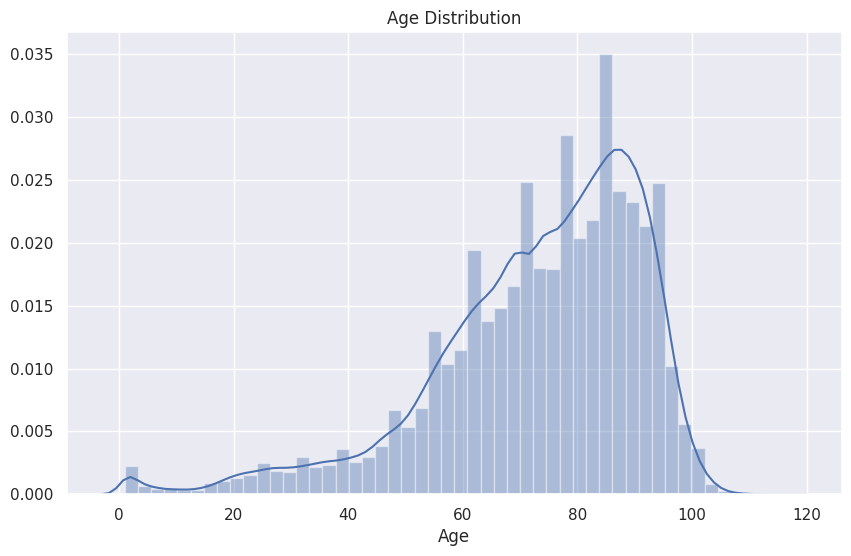

In [296]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.distplot(df["Age_Value"])
s = ax.set(xlabel='Age', ylabel='', title='Age Distribution')

### If married people die more than unmarried and other related

In [183]:
dfMarried = df[(df['Marital_Status'] == 'M') ]

In [184]:
dfSingle = df[(df['Marital_Status'] == 'S') ]

In [185]:
dfWidow = df[(df['Marital_Status'] == 'W') ]

In [186]:
dfDivorce = df[(df['Marital_Status'] == 'D') ]

In [187]:
dfUnknown = df[(df['Marital_Status'] == 'U') ]

In [188]:
marriedPer = dfMarried.shape[0] / df.shape[0] * 100
str(math.ceil(marriedPer)) + ' %'

'37 %'

In [189]:
singlePer = dfSingle.shape[0] / df.shape[0] * 100
str(math.ceil(singlePer)) + ' %'

'14 %'

In [190]:
widowPer = dfWidow.shape[0] / df.shape[0] * 100
str(math.ceil(widowPer)) + ' %'

'32 %'

In [191]:
divorcePer = dfDivorce.shape[0] / df.shape[0] * 100
str(math.ceil(divorcePer)) + ' %'

'17 %'

In [192]:
unknownPer = dfUnknown.shape[0] / df.shape[0] * 100
str(math.ceil(unknownPer)) + ' %'

'2 %'

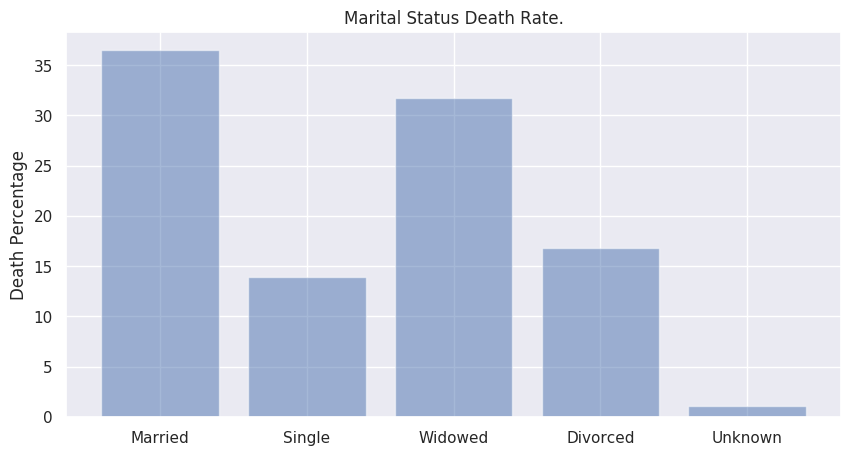

In [193]:

objects = ('Married', 'Single', 'Widowed', 'Divorced', 'Unknown')
y_pos = np.arange(len(objects))
percentages = [marriedPer, singlePer, widowPer, divorcePer, unknownPer]
plt.figure(figsize=(10,5))
plt.bar(y_pos, percentages, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Death Percentage')
plt.title('Marital Status Death Rate.')

plt.show();

### What are and will be the most common causes of death (This requires ML and right now is only w/o ML part)

In [194]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

In [195]:
objects = ['Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 'Self-Inflicted', 'Natural']

In [196]:
len(objects)

7

In [197]:
sortedCauseOfDeath = sorted(df["Manner_Of_Death"].unique())

In [198]:
labels = [objects[x-1] for x in sortedCauseOfDeath]

In [199]:
def getColumnPercentages(_df, column):
    return [((_df[_df[column] == uVal].shape[0]/_df[column].shape[0])*100) for uVal in sorted(_df[column].unique())]

In [200]:
deathCausePcts = getColumnPercentages(df, "Manner_Of_Death")

In [201]:
len(deathCausePcts)

6

In [202]:
for i in range(0, len(deathCausePcts)):
    print(f"{labels[i]}: {deathCausePcts[i]}%");

Accident: 5.959650119641156%
Suicide: 1.826228222508543%
Homicide: 0.8338868570788351%
Pending investigation: 0.22767832134254185%
Could not determine: 0.3755291820386213%
Natural: 90.7770272973903%


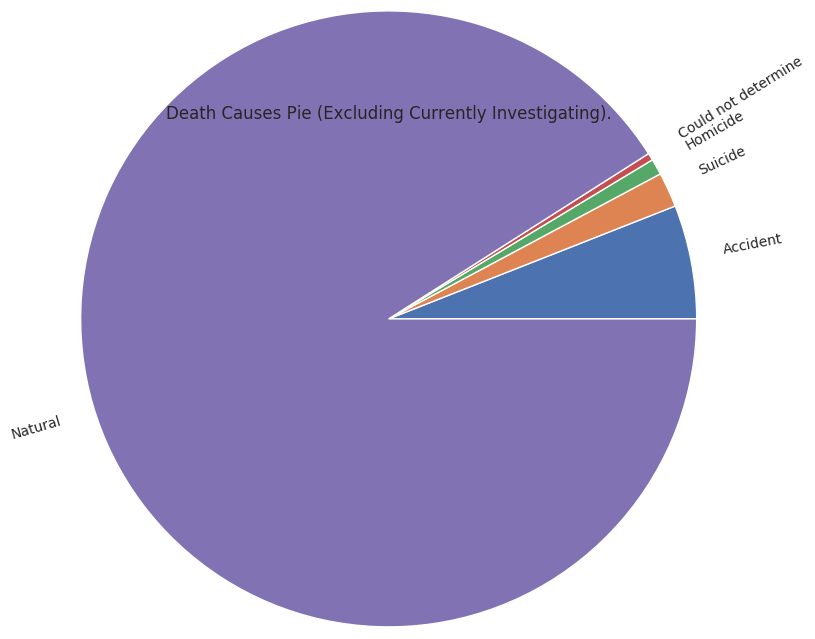

In [203]:
# percentages = [manner1Per, manner2Per, manner3Per, manner4Per, manner5Per, manner6Per, manner7Per]
# idx = deathCausePcts.index(0.0)
# percentages = deathCausePcts[:idx] + deathCausePcts[idx+1:]
# objects = objects[:idx] + objects[idx+1:]
plt.figure(figsize=(10,5))
plt.pie(
    x=deathCausePcts[:3]+deathCausePcts[4:],
    labels=labels[:3]+labels[4:],
    rotatelabels=45,
    radius=2,
    textprops={
        "fontsize": 10
    }
)
plt.title('Death Causes Pie (Excluding Currently Investigating).')
plt.show();

### Life expectancy for certain age groups

In [204]:
def getGroupedValues(dataF, colName, gap, total, isLast = False):
    pValue = 0
    nValue = gap
    values = []
    for i in range(0, total):
        values.append(dataF[(dataF[colName] >= pValue) & (dataF[colName] < nValue)].shape[0])
#         print(f"{pValue} - {nValue}")
        pValue = nValue
        nValue += gap
    if isLast:
        values.append(dataF[dataF[colName] >= nValue].shape[0])
    return values

In [205]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

[4174, 3196, 9358, 12165, 19922, 47263, 81026, 102751, 129966, 84356, 25]


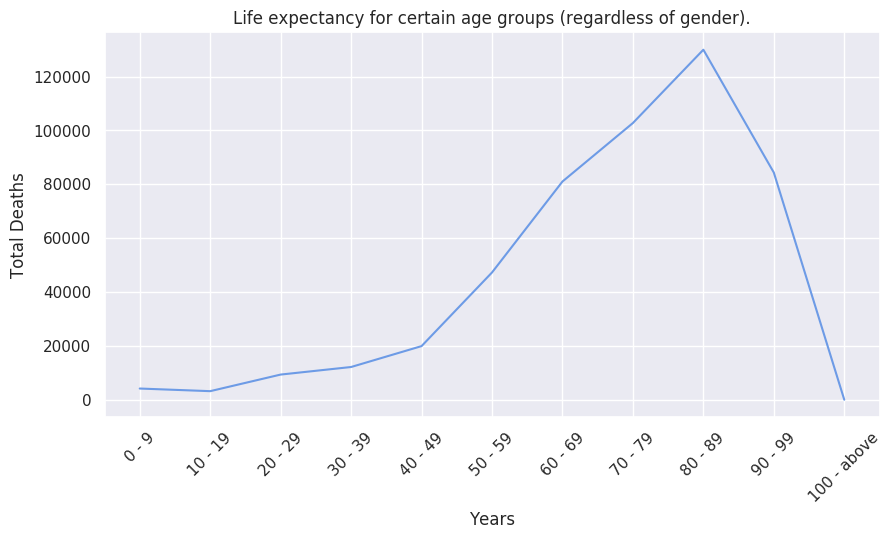

In [206]:
year = ['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '100 - above']
numberOfDeaths = getGroupedValues(df, "Age_Value", 10, len(year)-1, True)
print(numberOfDeaths)
plt.figure(figsize=(10,5))
plt.plot(year, numberOfDeaths, color='#6d9be6')
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Life expectancy for certain age groups (regardless of gender).')
plt.show()

### Death Rate Comparison/Correlation between both genders

In [207]:
maleData = df[df["Sex"] == "M"]

maleData.shape

(258799, 35)

In [208]:
femaleData = df[df["Sex"] == "F"]

femaleData.shape

(241029, 35)

In [209]:
c_years = year[:-2]
c_years.append('90 - 99')
c_years.append('100 - above')

In [210]:
maleDeaths = getGroupedValues(maleData, "Age_Value", 10, len(c_years)-1, True)
femaleDeaths = getGroupedValues(femaleData, "Age_Value", 10,len(c_years)-1, True)

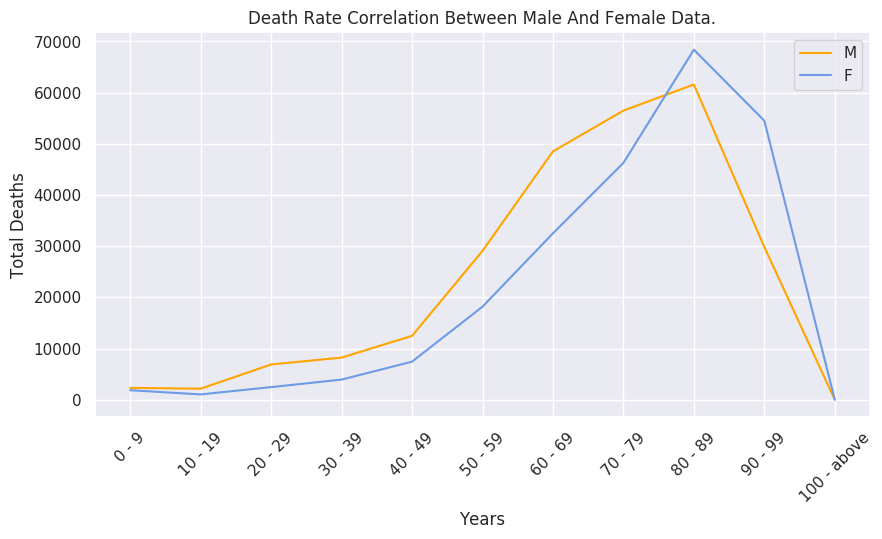

In [211]:
plt.figure(figsize=(10,5))
plt.plot(c_years, maleDeaths, color='orange')
# plt.show()
plt.plot(c_years, femaleDeaths, color='#6d9be6')
plt.legend(df["Sex"].unique())
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Deaths')
plt.title('Death Rate Correlation Between Male And Female Data.')
plt.show()

### How causes of death have changed compared to past 10 years

In [212]:
odf = pd.read_csv("VS07MORT.csv", nrows=100000)

odf.columns

Index(['Resident_Status', ' Education', ' Month_Of_Death', ' Sex', ' Age_Key',
       ' Age_Value', ' Age_Sub_Flag', ' Age_Recode_52', ' Age_Recode_27',
       ' Age_Recode_12', ' Infant_Age_Recode_22', ' Place_Of_Death',
       ' Marital_Status', ' DOW_of_Death', ' Data_Year', ' Injured_At_Work',
       ' Manner_Of_Death', ' Method_Of_Disposition', ' Autopsy',
       ' Activity_Code', ' Place_Of_Causal_Injury', '  ICD10',
       ' Cause_Recode_358', ' Cause_Recode_113', ' Infant_Cause_Recode_130',
       ' Cause_Recode_39', ' Entity_Axis_Conditions', ' EAC1', ' EAC2',
       ' EAC3', ' EAC4', ' EAC5', ' EAC6', ' EAC7', ' EAC8', ' EAC9', ' EAC10',
       ' EAC11', ' EAC12', ' EAC13', ' EAC14', ' EAC15', ' EAC16', ' EAC17',
       ' EAC18', ' EAC19', ' EAC20', ' Record_Axis_Conditions', ' RA1', ' RA2',
       ' RA3', ' RA4', ' RA5', ' RA6', ' RA7', ' RA8', ' RA9', ' RA10',
       ' RA11', ' RA12', ' RA13', ' RA14', ' RA15', ' RA16', ' RA17', ' RA18',
       ' RA19', ' RA20', ' Race', ' 

In [213]:
odf.shape

(100000, 75)

In [214]:
odf = cleanColumns(odf)

odf = odf.drop(columns=getInValuableColumns(odf))

odf = odf.applymap(lambda x: removeSpaces(x))

odf = cleanEmptyStringValues(odf)

odf = replaceNAWithMode(odf)

odf = odf.applymap(tryConvertingToNumber)

In [215]:
# odf = odf.drop(columns=[x for x in odf.columns if len(odf[x].unique()) <= 1 and odf[x].unique()[0] == None])

In [216]:
odf.columns

Index(['Resident_Status', 'Education', 'Month_Of_Death', 'Sex', 'Age_Key',
       'Age_Value', 'Age_Sub_Flag', 'Age_Recode_52', 'Age_Recode_27',
       'Age_Recode_12', 'Infant_Age_Recode_22', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'Activity_Code',
       'Place_Of_Causal_Injury', 'ICD10', 'Cause_Recode_358',
       'Cause_Recode_113', 'Infant_Cause_Recode_130', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC5', 'EAC6',
       'EAC7', 'EAC8', 'EAC9', 'EAC10', 'EAC11', 'EAC12', 'EAC13', 'EAC14',
       'EAC15', 'EAC16', 'EAC17', 'EAC18', 'EAC19', 'EAC20',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA5', 'RA6', 'RA7',
       'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14', 'RA15', 'RA16',
       'RA17', 'RA18', 'RA19', 'RA20', 'Race', 'Race_Bridged',
       'Race_Imputation', 'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin'

In [217]:
odf.columns.size

73

### Old (Other Dataset) Data Cleaning and Analysis

In [218]:
sortedCauses = sorted(odf["Manner_Of_Death"].unique())

sortedCauses

[1, 2, 3, 4, 5, 7]

In [219]:
oldDeathPcts = getColumnPercentages(odf, "Manner_Of_Death")

In [220]:
for i in range(0, len(oldDeathPcts)):
    print(f"{labels[i]}: {oldDeathPcts[i]}%")

Accident: 6.059%
Suicide: 1.82%
Homicide: 1.1280000000000001%
Pending investigation: 0.132%
Could not determine: 0.628%
Natural: 90.23299999999999%


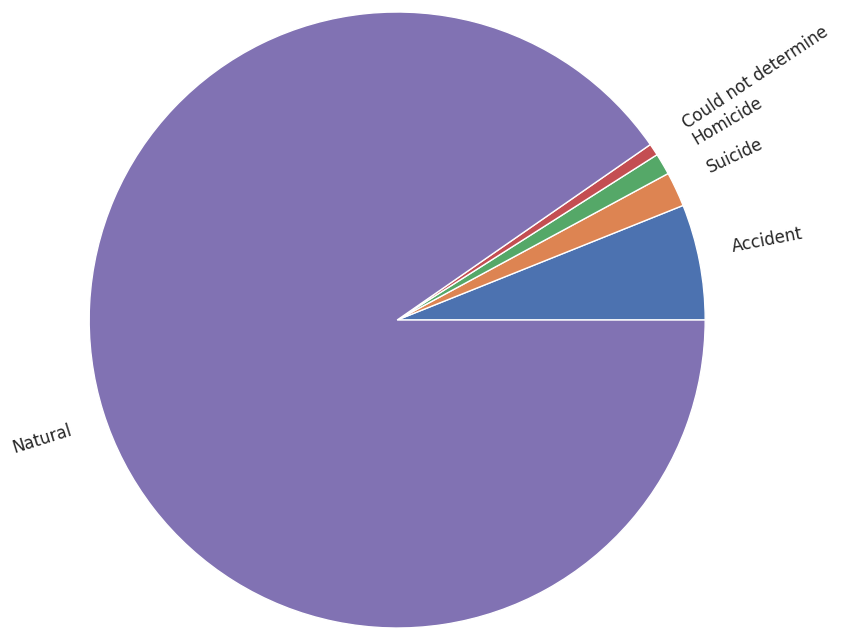

In [221]:
plt.figure(figsize=(10,5))
plt.pie(
    x=oldDeathPcts[:3]+oldDeathPcts[4:],
    labels=labels[:3]+labels[4:],
    rotatelabels=45,
    radius=2,
    textprops={
        "fontsize": 12
    }
)

plt.show()

### Comparison between 10 years past and 2017 Death rates:

In [222]:
for i in range(0, min(len(oldDeathPcts), len(deathCausePcts))):
    print(f"{labels[i]}: {math.ceil(oldDeathPcts[i])}%(old), {math.ceil(deathCausePcts[i])}%(current)")

Accident: 7%(old), 6%(current)
Suicide: 2%(old), 2%(current)
Homicide: 2%(old), 1%(current)
Pending investigation: 1%(old), 1%(current)
Could not determine: 1%(old), 1%(current)
Natural: 91%(old), 91%(current)


In [223]:
len(deathCausePcts)

6

## Last 10 year Death Cause Percentage Comparison

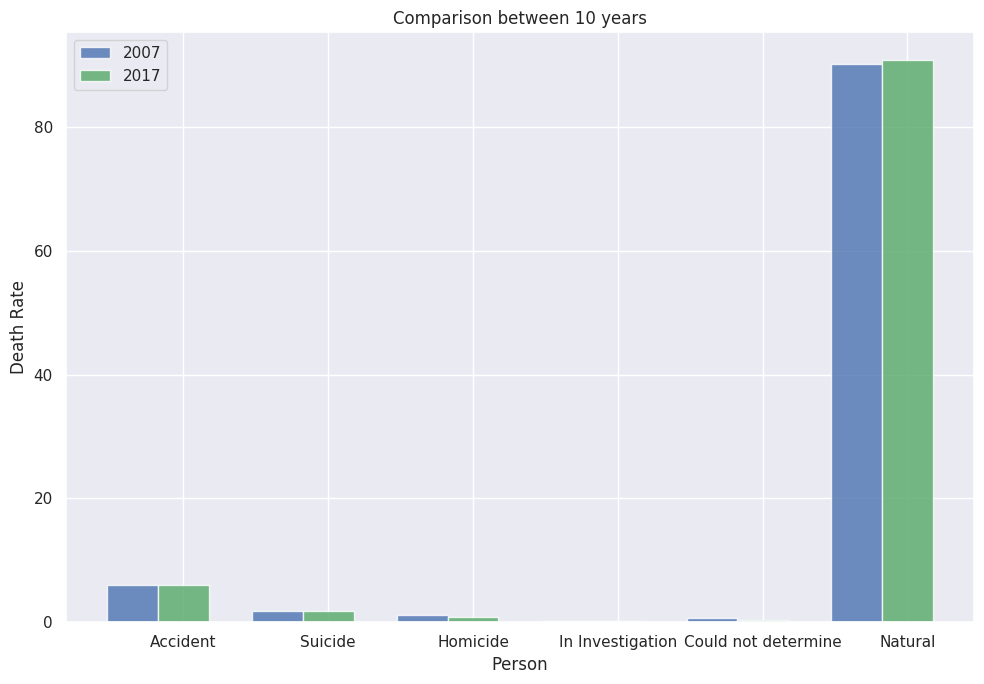

In [224]:
n_groups = len(deathCausePcts)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, oldDeathPcts, bar_width,
alpha=opacity,
color='b',
label='2007')

rects2 = plt.bar(index + bar_width, deathCausePcts, bar_width,
alpha=opacity,
color='g',
label='2017')
plt.xlabel('Person')
plt.ylabel('Death Rate')
plt.title('Comparison between 10 years')
plt.xticks(index + bar_width, ('Accident', 'Suicide', 'Homicide', 'In Investigation', 'Could not determine', 'Natural'))
plt.legend()

plt.tight_layout()
plt.show()

### Death of people which Injured at work

In [225]:
dfInjuredAtWork = df[(df['Injured_At_Work'] == 'Y') ]
injuredAtWorkPer = dfInjuredAtWork.shape[0] / df.shape[0] * 100
str(injuredAtWorkPer) + ' %'


'0.16105540305865218 %'

In [226]:
dfNotInjuredAtWork = df[(df['Injured_At_Work'] == 'N') ]
notInjuredAtWorkPer = dfNotInjuredAtWork.shape[0] / df.shape[0] * 100
str(notInjuredAtWorkPer) + ' %'

'8.473514889121859 %'

In [227]:

dfUnknownInjuredAtWork = df[(df['Injured_At_Work'] == 'U') ]
unknownInjuredAtWorkPer = dfUnknownInjuredAtWork.shape[0] / df.shape[0] * 100
str(unknownInjuredAtWorkPer) + ' %'

'91.36542970781949 %'

## Percentages of people who did and did not die at work

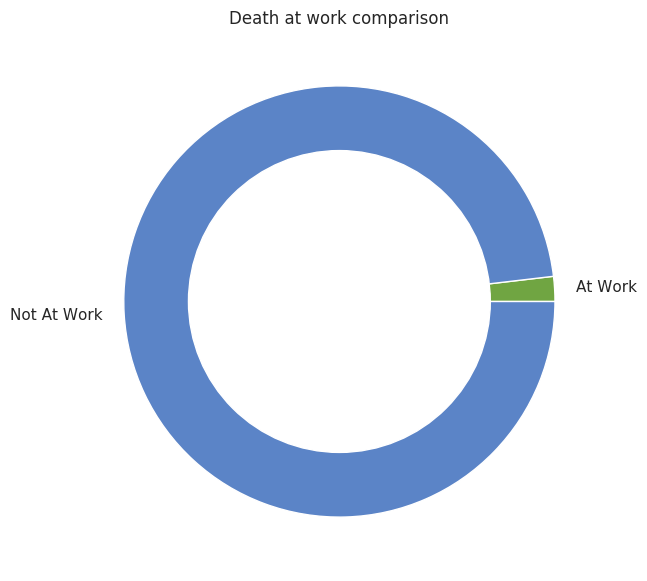

In [228]:
names='At Work', 'Not At Work'

my_circle=plt.Circle( (0,0), 0.7, color='white')
size= [injuredAtWorkPer, notInjuredAtWorkPer]
# Custom colors --> colors will cycle
plt.figure(figsize=(7,7))
plt.pie(size, labels=names, colors=['#70a542','#5b84c7','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Death at work comparison")
plt.show()


### Finding Most common disease using International Statistical Classification of Diseases and Related Health Problems

In [229]:
df.head()

,Resident_Status,Month_Of_Death,Sex,Age_Key,Age_Value,Age_Recode_52,Age_Recode_27,Age_Recode_12,Place_Of_Death,Marital_Status,...,Record_Axis_Conditions,RA1,RA2,RA3,RA4,Race,Race_Recode_3,Race_Recode_5,Hispanic_Origin,Hispanic_Origin_Recode
0,1,101,M,1,71,40,20,9,1,M,...,1,G20,I469,I469,I469,1,1,1,100,6
1,1,101,M,1,74,40,20,9,1,D,...,2,M726,A419,I469,I469,1,1,1,100,6
2,1,101,M,1,59,37,17,8,4,M,...,2,C159,F179,I469,I469,1,1,1,100,6
3,1,101,M,1,90,44,24,11,4,M,...,1,C61,I469,I469,I469,3,2,3,100,8
4,1,101,M,1,66,39,19,9,4,M,...,3,J449,C900,F179,I469,1,1,1,100,6


In [230]:
icd10 = (df.ICD10.value_counts()/df.ICD10.shape[0]* 100)[0:20]
icd10

I251    5.840409
G309    5.240003
C349    4.526757
J449    4.265467
I219    3.636851
I250    2.595493
I500    2.307194
F03     2.278184
I64     1.905656
C509    1.590347
J189    1.571341
C259    1.553734
C189    1.392279
G20     1.190009
C61     1.189209
I10     1.062966
I119    1.024552
I48     0.982538
C80     0.918116
K703    0.904911
Name: ICD10, dtype: float64

In [231]:
icd10.values

array([5.8404091 , 5.24000256, 4.5267572 , 4.26546732, 3.63685108,
       2.59549285, 2.30719367, 2.2781837 , 1.90565555, 1.59034708,
       1.57134054, 1.55373448, 1.39227894, 1.19000936, 1.18920909,
       1.06296566, 1.02455245, 0.98253799, 0.91811583, 0.90491129])

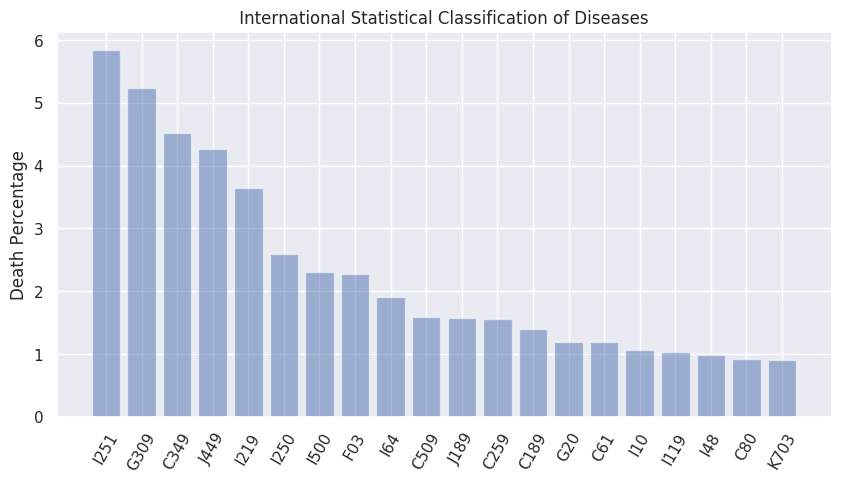

In [232]:

#objects = ('Married', 'Single', 'Widowed', 'Divorced', 'Unknown')
y_pos = np.arange(len(icd10.index))
#percentages = [marriedPer, singlePer, widowPer, divorcePer, unknownPer]

plt.figure(figsize=(10,5))
plt.bar(y_pos, icd10.values, align='center', alpha=0.5)
plt.xticks(y_pos, icd10.index, rotation=60)
plt.ylabel('Death Percentage')
plt.title(' International Statistical Classification of Diseases ')
plt.show();

According to the data, 
**C44** is related to **Chronic obstructive pulmonary disease and Skin Cancer**

Link to [Wikipedia](https://en.wikipedia.org/wiki/ICD-10_Chapter_II:_Neoplasms#(C40%E2%80%93C41)_Malignant_neoplasms,_bone_and_articular_cartilage) / [C44](https://en.wikipedia.org/wiki/Chronic_obstructive_pulmonary_disease)

*second*: **C349** was the second most common disease of death among the deceased and is related to **Malignant neoplasm of bronchus and lung cancer**.

Link to [Wikipedia](https://en.wikipedia.org/wiki/ICD-10_Chapter_II:_Neoplasms#(C30%E2%80%93C39)_Malignant_neoplasms,_respiratory_system_and_intrathoracic_organs) / [C34](https://en.wikipedia.org/wiki/Lung_cancer) series belongs to

### Distribution for Age of People who committed suicide

In [233]:
df[df["Manner_Of_Death"] == 2]["Age_Value"].unique()

array([ 32,  22,  34,  16,  31,  21,  17,  81,  19,  75,  25,  43,  35,
        29,  26,  67,  20,  62,  54,  70,  23,  56,  82,  45,  80,  14,
        66,  61,  50,  47,  39,  13,  27,  71,  44,  57,  65,  18,  28,
        30,  59,  55,  40,  24,  51,  46,  37,  41,  49,  64,  58,  33,
        42,  15,  48,  86,  90,  38,  52,  60,  63,  36,  88,  77,  73,
        68,  72,  69,  78,  74,  84,  76,  83,  87,  53,  85,  91,  89,
       100,  79,  92,  11,  10,  12,  94,   9,  93,  95,  96,  97,  98,
        99, 101])

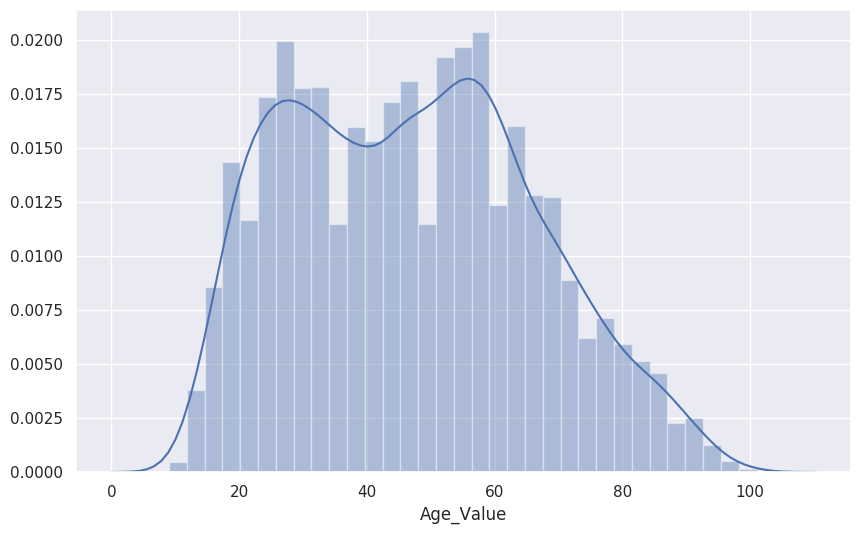

In [234]:
ax = sns.distplot(df[df["Manner_Of_Death"] == 2]["Age_Value"], kde_kws={'clip': (0, 200)})

## Transforming data (For Machine Learning Training)

In [235]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics and utility
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [236]:
df.shape

(499828, 35)

### Predicting Gender based on details of the person's death (Binary Classification)

In [237]:
def mapStringToNumbers(feature):
    unq = feature.unique().tolist()
    return (feature.apply(unq.index), unq)

In [238]:
def mapFeature(feature):
    return mapStringToNumbers(feature)[0] if feature.dtype == type(object) else feature

In [239]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

In [240]:
invalCols = [
    "EAC1",
    "EAC2",
    "EAC3",
    "ICD10",
    "Age_Key",
    "Age_Recode_52",
    "Age_Recode_27",
    "Age_Recode_12",
    "Data_Year",
    "Cause_Recode_39",
    "Cause_Recode_358",
    "Cause_Recode_113",
    "Cause_Recode_39",
    "RA1",
    "RA2",
    "RA3",
    "Race_Recode_3",
    "Race_Recode_5",
    "Hispanic_Origin_Recode",
]

In [241]:
features = df.loc[:, :"Manner_Of_Death"].apply(mapFeature)

In [242]:
len(features.columns)

14

In [243]:
target = features["Sex"]

In [244]:
features = features.drop(columns=["Sex"])

In [245]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [246]:
clf = RandomForestClassifier(max_depth=12, n_estimators=20, random_state=42)
martialPredictor = clf.fit(X_train, y_train)

In [247]:
maritalPrediction = martialPredictor.predict(X_test)

### ACCURACY

In [248]:
"{:0.0f} %".format(accuracy_score(y_test, maritalPrediction)*100)

'67 %'

In [249]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [250]:
# rcf = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [251]:
# rcf.fit(X_train, y_train)

### Loading and Saving model training

In [252]:
# pickle.dump(rcf, open("random_forest_optimized.pkl", "wb"))

In [253]:
# pk = pickle.load(open("random_forest_optimized.pkl", "rb"))

In [254]:
# maritalPrediction = pk.predict(X_test)

In [255]:
# "{:0.0f}.0 %".format(accuracy_score(maritalPrediction, y_test)*100)

In [256]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

In [257]:
sorted(df["Race"].unique())

[1, 2, 3, 4, 5, 6, 7, 18, 28, 38, 48, 58, 68, 78]

### Predict age according to condititons

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [259]:
atFeatures = df.loc[:, "Sex": "Marital_Status"].apply(mapFeature)

In [260]:
df.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

In [261]:
atFeatures = atFeatures.drop(columns=["Place_Of_Death"])

In [262]:
atFeatures.columns

Index(['Sex', 'Age_Key', 'Age_Value', 'Age_Recode_52', 'Age_Recode_27',
       'Age_Recode_12', 'Marital_Status'],
      dtype='object')

In [263]:
atTarget = atFeatures["Age_Value"]

In [264]:
atFeatures = atFeatures.drop(columns=["Age_Value"])

In [265]:
X_train, X_test, y_train, y_test = train_test_split(atFeatures, atTarget, test_size=0.33, random_state=42)

In [266]:
# atPredictor = LinearRegression(fit_intercept=True, n_jobs=4).fit(X_train, y_train)
atPredictor = RandomForestRegressor(max_depth=14, n_estimators=20, random_state=42).fit(X_train, y_train)

In [267]:
atPredictions = list(map(int, atPredictor.predict(X_test)))

In [268]:
atPredictions

[57,
 72,
 72,
 81,
 86,
 86,
 77,
 91,
 62,
 26,
 76,
 76,
 62,
 96,
 72,
 42,
 26,
 101,
 3,
 91,
 72,
 57,
 57,
 91,
 91,
 87,
 72,
 62,
 57,
 82,
 86,
 91,
 4,
 72,
 36,
 62,
 72,
 67,
 72,
 87,
 100,
 96,
 26,
 71,
 77,
 77,
 91,
 91,
 87,
 91,
 82,
 52,
 87,
 62,
 71,
 47,
 96,
 86,
 52,
 86,
 91,
 57,
 81,
 62,
 82,
 91,
 52,
 57,
 42,
 91,
 86,
 82,
 47,
 72,
 91,
 86,
 87,
 91,
 66,
 52,
 62,
 77,
 52,
 81,
 77,
 62,
 82,
 87,
 77,
 52,
 76,
 52,
 87,
 76,
 67,
 81,
 81,
 91,
 3,
 67,
 67,
 86,
 86,
 77,
 62,
 72,
 72,
 96,
 91,
 67,
 81,
 91,
 37,
 57,
 87,
 87,
 77,
 62,
 82,
 87,
 87,
 57,
 57,
 96,
 67,
 71,
 72,
 52,
 72,
 67,
 96,
 91,
 62,
 67,
 77,
 76,
 91,
 57,
 66,
 67,
 86,
 86,
 86,
 61,
 57,
 82,
 82,
 42,
 22,
 87,
 62,
 72,
 76,
 87,
 91,
 36,
 87,
 22,
 91,
 62,
 81,
 81,
 62,
 91,
 77,
 72,
 1,
 91,
 47,
 71,
 67,
 82,
 91,
 62,
 82,
 47,
 31,
 31,
 82,
 62,
 86,
 86,
 81,
 57,
 62,
 37,
 62,
 77,
 87,
 67,
 72,
 57,
 62,
 82,
 71,
 77,
 76,
 67,
 82,
 96,
 9

#### ACCURACY

In [269]:
f"{round(accuracy_score(y_test, atPredictions) * 100, 2) } %"

'20.83 %'

### Clustering

In [270]:
from sklearn.cluster import KMeans

In [271]:
df["Race"].unique()

array([ 1,  3,  5,  4,  7, 68,  2, 38,  6, 28, 48, 18, 78, 58])

In [272]:
df["Race"].value_counts()

1     413695
2      48652
4       7723
7       7208
3       6126
68      3979
5       3519
48      2939
28      2548
18      2016
78       748
38       323
6        182
58       170
Name: Race, dtype: int64

In [273]:
X = df.apply(mapFeature)

In [274]:
predictor = KMeans(n_clusters=4, random_state=0).fit(X)

In [275]:
y_means = predictor.predict(X)

In [276]:
centers = predictor.cluster_centers_

In [277]:
X.columns

Index(['Resident_Status', 'Month_Of_Death', 'Sex', 'Age_Key', 'Age_Value',
       'Age_Recode_52', 'Age_Recode_27', 'Age_Recode_12', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Data_Year', 'Injured_At_Work',
       'Manner_Of_Death', 'Method_Of_Disposition', 'Autopsy', 'ICD10',
       'Cause_Recode_358', 'Cause_Recode_113', 'Cause_Recode_39',
       'Entity_Axis_Conditions', 'EAC1', 'EAC2', 'EAC3', 'EAC4',
       'Record_Axis_Conditions', 'RA1', 'RA2', 'RA3', 'RA4', 'Race',
       'Race_Recode_3', 'Race_Recode_5', 'Hispanic_Origin',
       'Hispanic_Origin_Recode'],
      dtype='object')

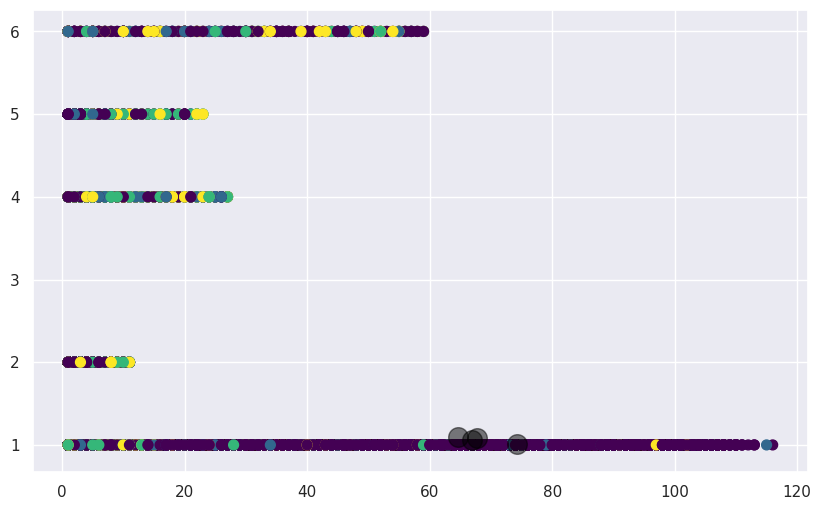

In [278]:
plt.scatter(X.loc[:, "Age_Value"], X.loc[:, "Age_Key"], c=y_means, s=50, cmap='viridis')
plt.scatter(centers[:, 4], centers[:, 3], c='black', s=200, alpha=0.5);

In [279]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

IQR

# print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

Resident_Status             0.0
Month_Of_Death              7.0
Age_Key                     0.0
Age_Value                  24.0
Age_Recode_52               5.0
Age_Recode_27               5.0
Age_Recode_12               3.0
Place_Of_Death              4.0
DOW_of_Death                4.0
Data_Year                   0.0
Manner_Of_Death             0.0
Cause_Recode_358          107.0
Cause_Recode_113           43.0
Cause_Recode_39            20.0
Entity_Axis_Conditions      2.0
Record_Axis_Conditions      2.0
Race                        0.0
Race_Recode_3               0.0
Race_Recode_5               0.0
Hispanic_Origin             0.0
Hispanic_Origin_Recode      0.0
dtype: float64

### Race Prediction (2017)

In [280]:
features = df.loc[:,"RA1":"Race"].apply(mapFeature)

In [281]:
features

,RA1,RA2,RA3,RA4,Race
0,0,0,0,0,1
1,1,1,0,0,1
2,2,2,0,0,1
3,3,0,0,0,3
4,4,3,1,0,1
...,...,...,...,...,...
499995,9,44,0,0,1
499996,145,22,0,0,1
499997,73,0,0,0,2
499998,368,0,0,0,1


In [282]:
target = features["Race"]

In [283]:
features = features.drop(columns=["Race"])

In [284]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [285]:
clf = RandomForestClassifier(max_depth=14, n_estimators=20, random_state=42)
racePredictor = clf.fit(X_train, y_train)
racePrediction = racePredictor.predict(X_test)

In [286]:
f"{round(accuracy_score(y_test, racePrediction) * 100, 2)} %"

'82.44 %'

### Person Race Prediction (2007)

In [287]:
oldFeatures = odf.loc[:,"RA1":"Race"].apply(mapFeature)

In [288]:
oldFeatures

,RA1,RA2,RA3,RA5,RA6,RA7,RA8,RA9,RA10,RA11,RA12,RA13,RA14,RA15,RA16,RA17,RA18,RA19,RA20,Race
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99996,310,276,187,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
99997,24,2,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99998,39,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [289]:
oldTar = oldFeatures["Race"]

In [290]:
oldFeatures = oldFeatures.drop(columns=["Race"])

In [291]:
X_train, X_test, y_train, y_test = train_test_split(oldFeatures, oldTar, test_size=0.2, random_state=42)

In [292]:
clf = RandomForestClassifier(max_depth=14, n_estimators=20, random_state=42)
racePredictor = clf.fit(X_train, y_train)
racePrediction = racePredictor.predict(X_test)

### ACCURACY

In [293]:
f"{accuracy_score(y_test, racePrediction) * 100} %"

'84.16 %'

In [294]:
df.dtypes

Resident_Status            int64
Month_Of_Death             int64
Sex                       object
Age_Key                    int64
Age_Value                  int64
Age_Recode_52              int64
Age_Recode_27              int64
Age_Recode_12              int64
Place_Of_Death             int64
Marital_Status            object
DOW_of_Death               int64
Data_Year                  int64
Injured_At_Work           object
Manner_Of_Death            int64
Method_Of_Disposition     object
Autopsy                   object
ICD10                     object
Cause_Recode_358           int64
Cause_Recode_113           int64
Cause_Recode_39            int64
Entity_Axis_Conditions     int64
EAC1                      object
EAC2                      object
EAC3                      object
EAC4                      object
Record_Axis_Conditions     int64
RA1                       object
RA2                       object
RA3                       object
RA4                       object
Race      